<a href="https://colab.research.google.com/github/prysykes/A-random-serial-number-generator/blob/main/FGSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [4]:
pathh = 'MNISTClassifier'

for parent, dirs, files in os.walk(pathh, topdown=False):
  for file in files:
    file_path = os.path.join(parent, file)
    os.remove(file_path)
  for dir in dirs:
    dir_path = os.path.join(parent, dir)
    os.rmdir(dir_path)

  os.rmdir('/content/MNISTClassifier')

In [5]:
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28, 28)).astype("float32") / 255
images = np.expand_dims(images, axis=3)
test_images = test_images.reshape((10000, 28, 28)).astype("float32") / 255
test_images = np.expand_dims(test_images, axis=3)
x_train, x_test = images[10000:], images[:10000]
y_train, y_test = labels[10000:], labels[:10000]

11490434/11490434 [==============================] - 0s 0us/step


Inspect data

2


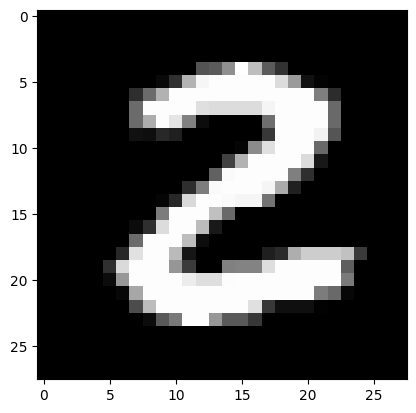

In [6]:
x_test[5].shape
digit = x_test[25]
fig = plt.figure
plt.imshow(digit, cmap='gray')
print(y_test[16])

# number 2 are found in these location: [(5, 2), (16, 2), (25, 2), (28, 2), (76, 2)]

In [7]:
few_twos = []
count = 0
for index, label in enumerate(y_test):
  if count > 9:
    break
  if label == 2:
    few_twos.append((index, label))
    count += 1

print(few_twos)

[(5, 2), (16, 2), (25, 2), (28, 2), (76, 2), (82, 2), (109, 2), (117, 2), (120, 2), (122, 2)]


In [8]:
print(few_twos)

[(5, 2), (16, 2), (25, 2), (28, 2), (76, 2), (82, 2), (109, 2), (117, 2), (120, 2), (122, 2)]


In [9]:
class MNISTClassifierSmall(tf.keras.Model):
  def __init__(self):
    super(MNISTClassifierSmall, self).__init__()

    #define layers
    self.conv1 = tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1))
    self.conv2 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1))
    self.conv3 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1))
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(10)

    self.layers_list = [self.conv1, self.conv2, self.conv3, self.flatten, self.dense1]

  @tf.function
  def call(self, *args, **kwargs):
    activation_list = []
    out = args[0]
    for layer in self.layers_list:
      out = layer(out)
      activation_list.append(out)

    if kwargs['training']:
      return out

    else:
      prob = tf.nn.softmax(out)
      return out, prob


In [10]:
model = MNISTClassifierSmall()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

model.save('MNISTClassifierSmall')
# model = keras.models.load_model("MNISTClassifier.keras")

Epoch 1/10
1563/1563 [==============================] - 20s 5ms/step - loss: 0.1221 - accuracy: 0.9616 - val_loss: 0.0629 - val_accuracy: 0.9813
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0438 - accuracy: 0.9866 - val_loss: 0.0556 - val_accuracy: 0.9838
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0283 - accuracy: 0.9906 - val_loss: 0.0704 - val_accuracy: 0.9817
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0198 - accuracy: 0.9939 - val_loss: 0.0501 - val_accuracy: 0.9889
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0549 - val_accuracy: 0.9885
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0675 - val_accuracy: 0.9874
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0079 - accuracy: 0.9973 - val_loss: 0.0689 - val_accurac

In [7]:
class MNISTClassifier(tf.keras.Model):
    def __init__(self):
        super(MNISTClassifier, self).__init__()

        # Define the layers
        #for feature extration
        self.conv1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))
        self.max_pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')
        self.max_pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.flatten = tf.keras.layers.Flatten()
        self.dropout1 = tf.keras.layers.Dropout(0.25)
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout2 = tf.keras.layers.Dropout(0.5)
        self.dense2 = tf.keras.layers.Dense(10)
        self.layers_list = [self.conv1, self.max_pool1, self.conv2, self.max_pool2,
                           self.flatten, self.dropout1, self.dense1, self.dropout2, self.dense2]
    @tf.function
    def call(self, *args, **kwargs):
        # Define the forward pass
        # output is the model logits
        activation_list = []
        out = args[0]
        for layer in self.layers_list:
           out = layer(out)
           activation_list.append(out)

        if kwargs['training']:
          #notice that training is a kw argument checked when fit is called
          #so when model is training, all I need is the output logits to call the loss function upon
          return out
        else:
          prob = tf.nn.softmax(out)
          return out, prob

In [8]:
class SaveFinalTrainingLogitsProp(keras.callbacks.Callback):
  def on_train_end(self, logs):
    self.out = model.predict(x_train)
    self.prob = tf.nn.softmax(self.out)
    print(self.out.shape, self.prob.shape)


In [8]:
model = MNISTClassifier()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

model.save('MNISTClassifier')
# model = keras.models.load_model("MNISTClassifier.keras")

Epoch 1/10
1563/1563 [==============================] - 17s 7ms/step - loss: 0.2674 - accuracy: 0.9161 - val_loss: 0.0682 - val_accuracy: 0.9800
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1008 - accuracy: 0.9699 - val_loss: 0.0559 - val_accuracy: 0.9827
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0728 - accuracy: 0.9776 - val_loss: 0.0450 - val_accuracy: 0.9867
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0632 - accuracy: 0.9813 - val_loss: 0.0404 - val_accuracy: 0.9893
Epoch 5/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.0539 - accuracy: 0.9833 - val_loss: 0.0379 - val_accuracy: 0.9894
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0480 - accuracy: 0.9854 - val_loss: 0.0381 - val_accuracy: 0.9888
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0436 - accuracy: 0.9870 - val_loss: 0.0385 - val_accur

## load model and make predictions

In [11]:
# select a few twos from the test dataset and reshape
# twos are at [(5, 2), (16, 2), (25, 2), (28, 2), (76, 2)]

twos_tuple = [(5, 2), (16, 2), (25, 2), (28, 2), (76, 2), (82, 2), (109, 2), (117, 2), (120, 2), (122, 2)]
reshaped_sample_twos = []
for tup in twos_tuple:
  a_two = x_test[tup[0]]
  a_two = np.reshape(a_two, (-1, 28, 28, 1))
  reshaped_sample_twos.append(a_two)
reshaped_sample_twos = np.array(reshaped_sample_twos)
# a_five = np.reshape(x_test[47], (-1, 28, 28, 1))
# print(a_five.shape)

In [12]:
print(reshaped_sample_twos.shape) #the network expects a rank 4 tensor ie. batch, width, hieght, channel

(10, 1, 28, 28, 1)


In [13]:
# location of 2 in x_test # number 2 are found in these location: [(5, 2), (16, 2), (25, 2), (28, 2), (76, 2)]
model = tf.keras.models.load_model('MNISTClassifierSmall')

prediction = []
for sample in reshaped_sample_twos:
  sample_prediction = model.predict(sample)
  prediction.append(sample_prediction)
# print(np.argmax(prediction))
print(np.argmax(prediction[0][1]))

1/1 [==============================] - 0s 19ms/step
2


In [14]:
print(np.argmax(prediction[1][0]))

2


In [15]:
reshaped_sample_twos[0].shape
print("hh", reshaped_sample_twos[0].shape)
#squeze to drop first dim
squeze_two = np.expand_dims(np.squeeze(reshaped_sample_twos[2]), axis=2)
squeze_two.shape
x = squeze_two
x = np.expand_dims(x, axis=0)
x = tf.convert_to_tensor(x)
y = y_test[5]
y = tf.convert_to_tensor(y)

print(y)
print(x.shape)

hh (1, 28, 28, 1)
tf.Tensor(2, shape=(), dtype=uint8)
(1, 28, 28, 1)


In [40]:
# #twos_tuple = [(5, 2), (16, 2), (25, 2), (28, 2), (76, 2), (82, 2), (109, 2), (117, 2), (120, 2), (122, 2)]
# class_arr = []

# for tup in twos_tuple:
#   y_frm_ytest = y_test[tup[0]]
#   y_tensor = tf.convert_to_tensor(y_frm_ytest)
#   class_arr.append(y_tensor)

# # # class_arr = [tf.convert_to_tensor(y_test[tup[0]]) for tup in twos_tuple]

# # print(class_arr)

In [17]:
class_arr = [tf.convert_to_tensor(y_test[tup[0]]) for tup in twos_tuple]

print(class_arr)

[<tf.Tensor: shape=(), dtype=uint8, numpy=2>, <tf.Tensor: shape=(), dtype=uint8, numpy=2>, <tf.Tensor: shape=(), dtype=uint8, numpy=2>, <tf.Tensor: shape=(), dtype=uint8, numpy=2>, <tf.Tensor: shape=(), dtype=uint8, numpy=2>, <tf.Tensor: shape=(), dtype=uint8, numpy=2>, <tf.Tensor: shape=(), dtype=uint8, numpy=2>, <tf.Tensor: shape=(), dtype=uint8, numpy=2>, <tf.Tensor: shape=(), dtype=uint8, numpy=2>, <tf.Tensor: shape=(), dtype=uint8, numpy=2>]


In [18]:
def fgsm(model, x, y, eps):
  # tensor of same shape as x to hold perturbation
  #x coming in is already perturbed version of x
  # delta = tf.zeros_like(x)
  y = tf.one_hot(y, 10)
  y = np.reshape(y, (1,10))
  y_pred = None

  num_iteration = 1
  x = tf.cast(x, tf.float32)
  while (num_iteration < 100):

    with tf.GradientTape() as tape:
        tape.watch(x)
        y_pred = model(x)
        y_pred = y_pred[1]
        # print("y_pred", y_pred)
        # print("y", y)
        loss = tf.keras.losses.categorical_crossentropy(y, y_pred, from_logits=True)
    gradient = tape.gradient(loss, x)
    gradient /= tf.math.reduce_std(gradient) + 1e-8
    signed_grad = tf.sign(gradient)
    perturbation = eps*signed_grad
    adv_x = x + perturbation
    adv_x = tf.clip_by_value(adv_x, 0, 1) # make sure the perturbed image is still in [0, 1] range
    x = adv_x
    if num_iteration%10 == 0:
      print(f"Num_iterations: {num_iteration} \n Y_Pred: {np.argmax(y_pred)} \n Y: {np.argmax(y)}")
    if np.argmax(y_pred) != np.argmax(y):
      break
    num_iteration += 1
  return adv_x, perturbation



## Batch **operations**

### Batch Attack

In [84]:
def batch_predict(model, results_arr, original_img_arr):
  predictions = {"original": [],
                 "adversarial": []}
  for element in zip(results_arr, original_img_arr):
    orig_current_pred = model.predict(element[1])
    adv_current_pred = model.predict(element[0][0])
    orig_current_pred = np.argmax(orig_current_pred[1])
    adv_current_pred = np.argmax(adv_current_pred[1])

    predictions['original'].append(orig_current_pred)
    predictions['adversarial'].append(adv_current_pred)

  print("predictions", predictions)
  return predictions

In [19]:
def run_attacks(model, img_arr, class_arr, att_func):
  result = []
  # result contains a tupple of AE and Pertubation

  for img, cls in zip(img_arr, class_arr):
    x_test_adv, perturbation = att_func(model, img, cls, 0.1)
    result.append((x_test_adv, perturbation))

  return result

In [20]:
results = run_attacks(model, reshaped_sample_twos, class_arr, fgsm)

In [85]:
batch_predictions = batch_predict(model, results, reshaped_sample_twos)

1/1 [==============================] - 0s 17ms/step
predictions {'original': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'adversarial': [8, 3, 8, 7, 8, 0, 0, 3, 7, 1]}


In [69]:
adv_pred = model.predict(results[0][0])
org_pred = model.predict(reshaped_sample_twos[0])

print("ori", np.argmax(org_pred[1]))
print("adv", np.argmax(adv_pred[1]))

1/1 [==============================] - 0s 18ms/step
ori 2
adv 8


### Prepare batch

In [21]:
def prepare_for_plt(results_arr, org_img_arr):
  print(len(results_arr), len(org_img_arr))
  new_results_arr = []
  new_org_img_arr = []
  print(f"Image: {results[0][0].shape} \n Perturbation: {results[0][1].shape} \n Original: {reshaped_sample_twos[0].shape}")
  for tup in results_arr:
    reshaped_adv_img = np.squeeze(tup[0])
    reshaped_adv_img = np.expand_dims(reshaped_adv_img, axis=2)

    reshaped_perturb = np.squeeze(tup[1])
    reshaped_perturb = np.expand_dims(reshaped_perturb, axis=2)
    new_results_arr.append((reshaped_adv_img, reshaped_perturb))
  for img in org_img_arr:
    reshaped_img = np.squeeze(img)
    reshaped_img = np.expand_dims(reshaped_img, axis=2)
    new_org_img_arr.append(reshaped_img)

  print(f"ADV Image: { new_results_arr[0][0].shape} \n ADVPerturbation: {new_results_arr[0][1].shape} \n AAOriginal: {new_org_img_arr[0].shape}")

  return (new_results_arr, new_org_img_arr)


In [22]:
new_results_arr, new_org_img_arr = prepare_for_plt(results, reshaped_sample_twos)

10 10
Image: (1, 28, 28, 1) 
 Perturbation: (1, 28, 28, 1) 
 Original: (1, 28, 28, 1)
ADV Image: (28, 28, 1) 
 ADVPerturbation: (28, 28, 1) 
 AAOriginal: (28, 28, 1)


### Batch plot function

In [124]:
def batch_distance_measure(new_results_arr, new_org_img_arr):
  distance = []

  for idx, element in enumerate(new_results_arr):
    flattened_adv_img = element[0].flatten()
    flattened_org_img = new_org_img_arr[idx].flatten()
    cur_distance = np.linalg.norm(flattened_org_img - flattened_adv_img)
    distance.append(round(cur_distance, 2))


  return distance

In [125]:
distance_arr = batch_distance_measure(new_results_arr, new_org_img_arr)
print(distance_arr)

[4.29, 4.44, 3.41, 3.38, 4.85, 4.57, 4.05, 3.13, 3.23, 4.4]


In [128]:
def batch_plot_function(new_results_arr, new_org_img_arr, predictions, distance_arr, fig):
  # distance_arr = [1.11, 2.22, 3.33, 4.44, 5.55, 6.66, 7.77, 8.88, 9.99, 10.11]
  rows = len(new_results_arr)
  columns = 3
  i = 0

  for idx, arr in enumerate(new_results_arr):
    i+=1

    fig.add_subplot(rows, columns, i)
    plt.imshow(new_org_img_arr[idx], cmap="gray")
    cur_orig_prediction = predictions['original'][idx]
    plt.axis('off')
    plt.title(f'Original Image  Prediction: {cur_orig_prediction}')

    i+=1
    fig.add_subplot(rows, columns, i)
    plt.imshow(new_results_arr[idx][1], cmap="gray")
    plt.axis('off')
    print("disy", distance_arr[idx])
    plt.title(f'Perturbation Distance: {distance_arr[idx]}')

    i +=1
    fig.add_subplot(rows, columns, i)
    plt.imshow(new_results_arr[idx][0], cmap="gray")
    cur_adv_prediction = predictions['adversarial'][idx]
    plt.axis('off')
    plt.title(f'Adversarial Image  Prediction: {cur_adv_prediction}')









disy 4.29
disy 4.44
disy 3.41
disy 3.38
disy 4.85
disy 4.57
disy 4.05
disy 3.13
disy 3.23
disy 4.4


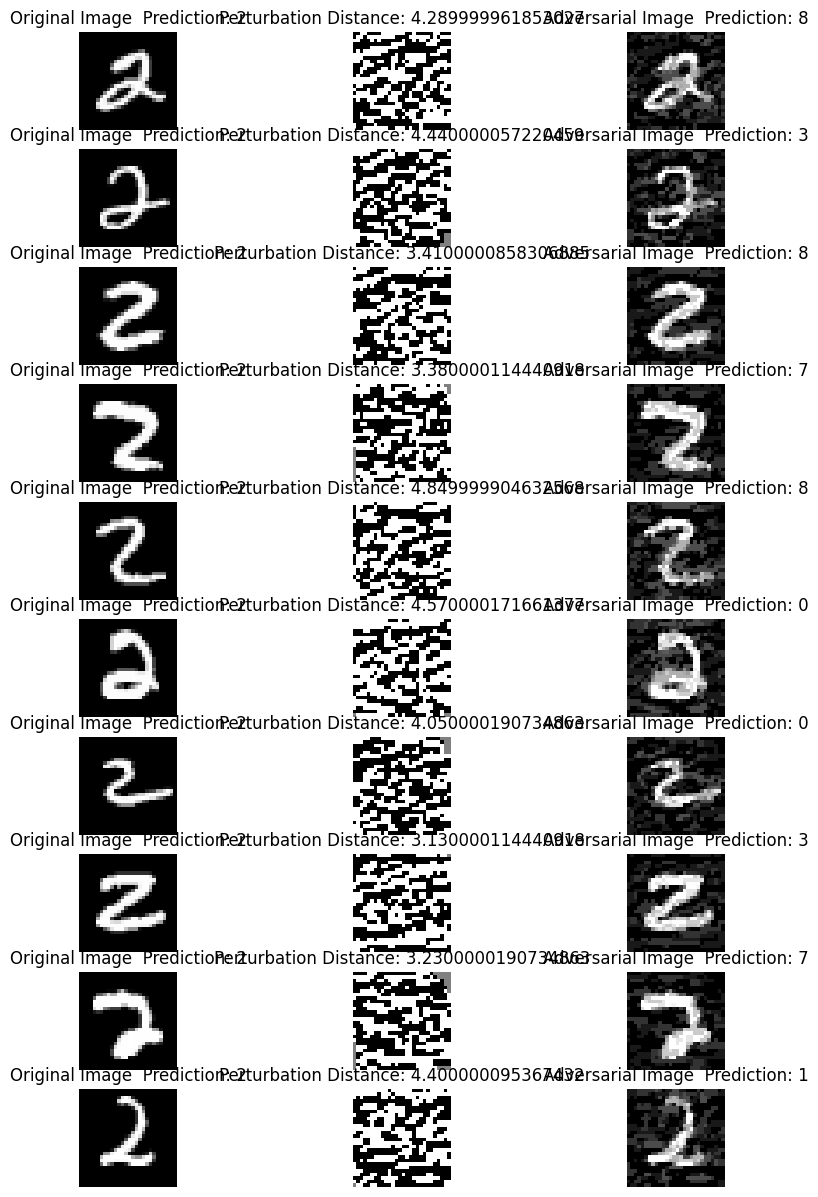

In [129]:
fig = plt.figure(figsize=(10, 15))

batch_plot_function(new_results_arr, new_org_img_arr, batch_predictions, distance_arr, fig)

### Batch Distance Measure

In [97]:
# ({new_results_arr}, {new_org_img_arr})

# print(new_results_arr[0][0].shape)
# print(new_org_img_arr[0].shape)
# org_image_flattened = org_image.flatten()
# adv_image_flattened = adv_image.flatten()
# distance = np.linalg.norm(org_image_flattened - adv_image_flattened)

def batch_distance_measure(new_results_arr, new_org_img_arr):
  distance = []

  for idx, element in enumerate(new_results_arr):
    flattened_adv_img = element[0].flatten()
    flattened_org_img = new_org_img_arr[idx].flatten()
    cur_distance = np.linalg.norm(flattened_org_img - flattened_adv_img)
    distance.append(cur_distance)
    print("cur dist", cur_distance)
  print("dist", distance)
  return distance

In [98]:
batch_distance_measure(new_results_arr, new_org_img_arr)

cur dist 4.2938967
cur dist 4.4445457
cur dist 3.4073882
cur dist 3.375853
cur dist 4.8481474
cur dist 4.5711284
cur dist 4.0460234
cur dist 3.1315095
cur dist 3.231387
cur dist 4.40006
dist [4.2938967, 4.4445457, 3.4073882, 3.375853, 4.8481474, 4.5711284, 4.0460234, 3.1315095, 3.231387, 4.40006]


In [31]:
xb = reshaped_sample_twos[0]
print(xb.shape)

(1, 28, 28, 1)


In [30]:
x_test_adv, perturbation = fgsm(model, xb, y, 0.01)

Num_iterations: 10 
 Y_Pred: 2 
 Y: 2


## Metrics for large Model

(28, 28, 1)


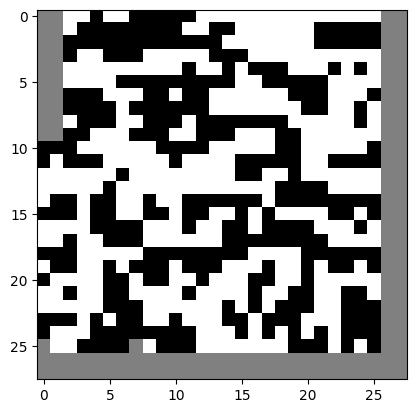

In [55]:
# x_test[5].shape
# digit = x_test[16]
# fig = plt.figure
# plt.imshow(digit, cmap='gray')
# print(y_test[16])

perturbation = np.squeeze(perturbation)
perturbation = np.expand_dims(perturbation, axis=2)
print(perturbation.shape)

plt.imshow(perturbation, cmap='gray')

In [52]:
print(x_test_adv.shape)
print(x.shape)

(1, 28, 28, 1)
(1, 28, 28, 1)


(28, 28, 1)


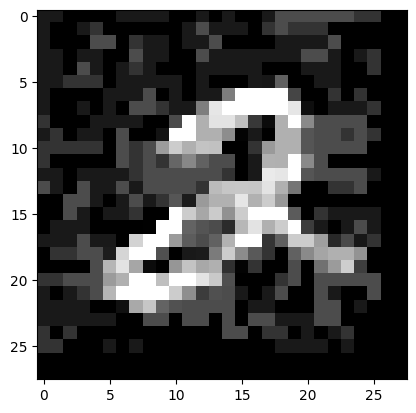

In [53]:
adv_image = np.squeeze(x_test_adv)
adv_image = np.expand_dims(adv_image, axis=2)
print(adv_image.shape)

plt.imshow(adv_image, cmap='gray')

In [20]:
adv_pred = model.predict(x_test_adv)
org_pred = model.predict(x)

org_pred = np.argmax(org_pred[1])
adv_pred = np.argmax(adv_pred[1])
# print(np.argmax(org_pred[1]))
# print(np.argmax(adv_pred[1]))

1/1 [==============================] - 0s 32ms/step


In [21]:
org_image = np.expand_dims(np.squeeze(x), axis=2)
print("orig img", org_image.shape)
print("adv img", adv_image.shape)

orig img (28, 28, 1)
adv img (28, 28, 1)


### Visualizing data large model

Text(0.5, 1.0, 'Adversarial Image \n Prediction: 8')

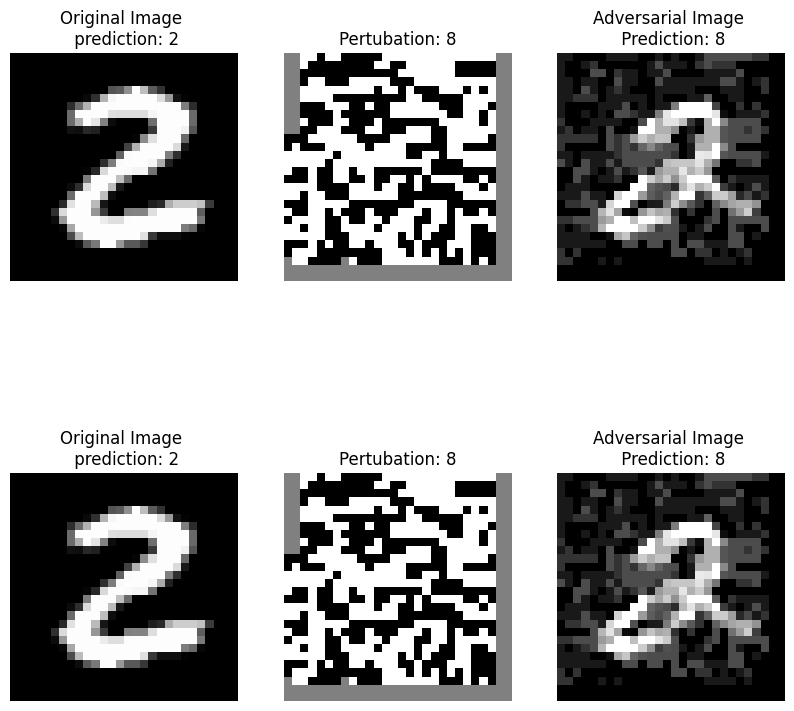

In [81]:
fig = plt.figure(figsize=(10, 10))

rows = 2
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(org_image, cmap='gray')
plt.axis('off')
plt.title(f'Original Image \n prediction: {org_pred}')

fig.add_subplot(rows, columns, 2)
plt.imshow(perturbation, cmap='gray')
plt.axis('off')
plt.title(f'Pertubation: {adv_pred}')

fig.add_subplot(rows, columns, 3)
plt.imshow(adv_image, cmap='gray')
plt.axis('off')
plt.title(f'Adversarial Image \n Prediction: {adv_pred}')

fig.add_subplot(rows, columns, 4)
plt.imshow(org_image, cmap='gray')
plt.axis('off')
plt.title(f'Original Image \n prediction: {org_pred}')

fig.add_subplot(rows, columns, 5)
plt.imshow(perturbation, cmap='gray')
plt.axis('off')
plt.title(f'Pertubation: {adv_pred}')

fig.add_subplot(rows, columns, 6)
plt.imshow(adv_image, cmap='gray')
plt.axis('off')

plt.title(f'Adversarial Image \n Prediction: {adv_pred}')

### Attack evaluation large model

In [23]:
# flatten the image arrays as a 1D array
org_image_flattened = org_image.flatten()
adv_image_flattened = adv_image.flatten()
print(np.shape(org_image_flattened))
print(np.shape(adv_image_flattened))

# # generating count histogram for the images
# org_image_counter = Counter(org_image_flattened)
# org_image_hist = []

# adv_image_counter = Counter(adv_image_flattened)
# adv_image_hist = []

# for num in range(256):
#   if num in org_image_counter.keys():
#     org_image_hist.append(org_image_counter[num])
#   else:
#     org_image_hist.append(0)

# for num in range(256):
#   if num in adv_image_counter.keys():
#     adv_image_hist.append(adv_image_counter[num])
#   else:
#     adv_image_hist.append(0)


# compute the euclidean distance between the two images
# distance1 = np.linalg.norm(np.array(org_image_hist) - np.array(adv_image_hist))

distance = np.linalg.norm(org_image_flattened - adv_image_flattened)

print(f"Distance: {distance}")


(784,)
(784,)
Distance: 9.834304809570312


## Metrics for small model

(28, 28, 1)


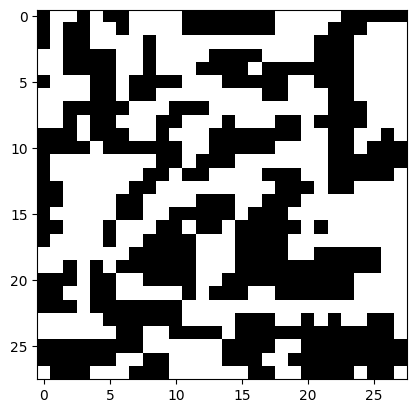

In [16]:
# x_test[5].shape
# digit = x_test[16]
# fig = plt.figure
# plt.imshow(digit, cmap='gray')
# print(y_test[16])

perturbation = np.squeeze(perturbation)
perturbation = np.expand_dims(perturbation, axis=2)
print(perturbation.shape)

plt.imshow(perturbation, cmap='gray')

In [36]:
print(x_test_adv.shape)
print(x.shape)

(1, 28, 28, 1)
(1, 28, 28, 1)


(28, 28, 1)


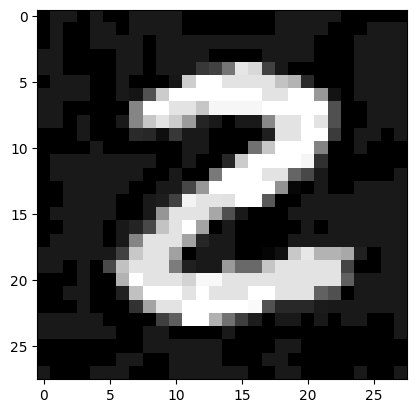

In [17]:
adv_image = np.squeeze(x_test_adv)
adv_image = np.expand_dims(adv_image, axis=2)
print(adv_image.shape)

plt.imshow(adv_image, cmap='gray')

In [41]:
adv_pred = model.predict(x_test_adv)
org_pred = model.predict(x)

org_pred = np.argmax(org_pred[1])
adv_pred = np.argmax(adv_pred[1])
# print(np.argmax(org_pred[1]))
# print(np.argmax(adv_pred[1]))

1/1 [==============================] - 0s 18ms/step


In [28]:
org_image = np.expand_dims(np.squeeze(x), axis=2)
print("orig img", org_image.shape)
print("adv img", adv_image.shape)

orig img (28, 28, 1)
adv img (28, 28, 1)


## Visualizing the data Small Model

Text(0.5, 1.0, 'Adversarial Image \n Prediction: 3')

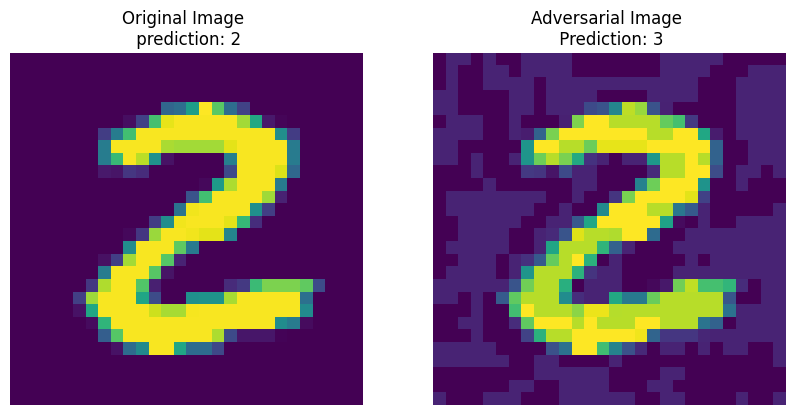

In [42]:
fig = plt.figure(figsize=(10, 10))

rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(org_image)
plt.axis('off')
plt.title(f'Original Image \n prediction: {org_pred}')

fig.add_subplot(rows, columns, 2)
plt.imshow(perturbation)
plt.axis('off')
plt.title(f'Pertubation: {adv_pred}')

fig.add_subplot(rows, columns, 3)
plt.imshow(adv_image)
plt.axis('off')
plt.title(f'Adversarial Image \n Prediction: {adv_pred}')

## Attack Evaluation - Distance Measure

In [43]:
from PIL import Image
from collections import Counter

In [51]:
# flatten the image arrays as a 1D array
org_image_flattened = org_image.flatten()
adv_image_flattened = adv_image.flatten()
print(np.shape(org_image_flattened))
print(np.shape(adv_image_flattened))

# # generating count histogram for the images
# org_image_counter = Counter(org_image_flattened)
# org_image_hist = []

# adv_image_counter = Counter(adv_image_flattened)
# adv_image_hist = []

# for num in range(256):
#   if num in org_image_counter.keys():
#     org_image_hist.append(org_image_counter[num])
#   else:
#     org_image_hist.append(0)

# for num in range(256):
#   if num in adv_image_counter.keys():
#     adv_image_hist.append(adv_image_counter[num])
#   else:
#     adv_image_hist.append(0)


# compute the euclidean distance between the two images
# distance1 = np.linalg.norm(np.array(org_image_hist) - np.array(adv_image_hist))

distance = np.linalg.norm(org_image_flattened - adv_image_flattened)

print(f"Distance: {distance}")



(784,)
(784,)
Distance 1 287.7377278008569 
 distnace 2 2.1441874504089355
